ChatGPT mean sentiment: 
0.22044799999999998
Gemini mean sentiment: 
0.3469238095238096
              Positive Theme  Instances_GPT  Instances_Gemini
0                   Accuracy            NaN               5.0
1                    Clarity            1.0               2.0
2          Contextualization            2.0               NaN
3                 Creativity            1.0               1.0
4                      Depth            1.0               2.0
5       Emotional Engagement            3.0               1.0
6   Human-like Communication            1.0               2.0
7             Output Quality            5.0               5.0
8               Presentation            2.0               1.0
9           Research Support            1.0               1.0
10                     Speed            NaN               2.0
11    Structure/Organization            2.0               2.0
12             Study Support            5.0               NaN


/var/folders/k0/d0glwt3n2014zzzgkm47cv2m0000gq/T/ipykernel_77373/1713202271.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_trust.fillna('N/A', inplace=True)
/var/folders/k0/d0glwt3n2014zzzgkm47cv2m0000gq/T/ipykernel_77373/1713202271.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_satisfaction.fillna('N/A', inplace=True)


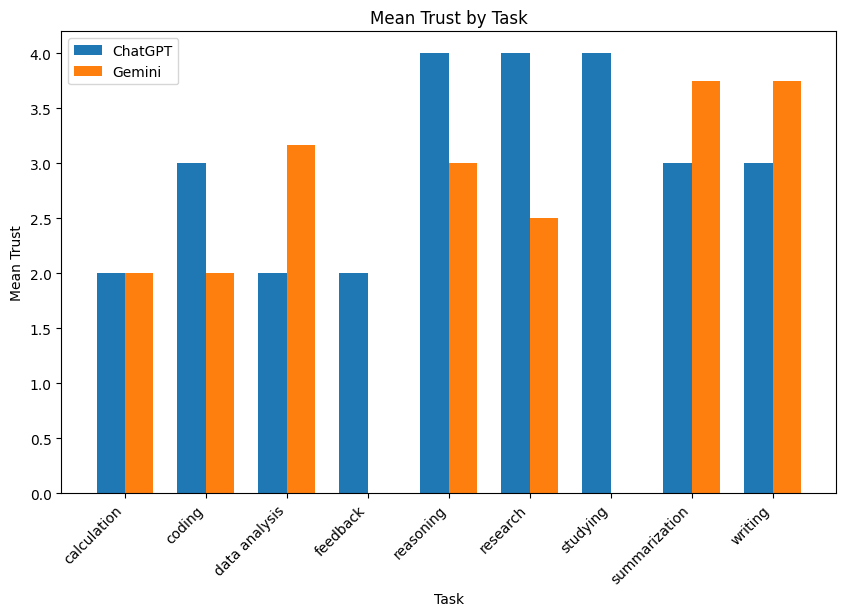

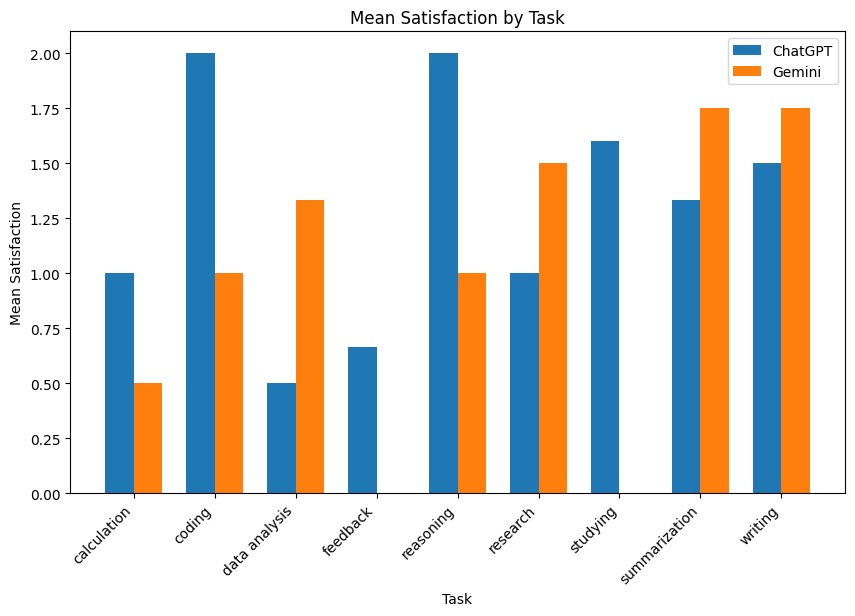

In [ ]:
##What is people's overall sentiment toward each model?

import pandas as pd

#Clean and normalize Tool column
updated_df = pd.read_csv('updated_data.csv')
updated_df['Tool'] = updated_df['Tool'].str.strip()

#Separate ChatGPT & Gemini data
df_chatgpt = updated_df[updated_df['Tool'].str.lower().str.contains('chatgpt')].copy()
df_gemini = updated_df[updated_df['Tool'].str.lower().str.contains('gemini')].copy()

#Find average sentiment for ChatGPT vs. Gemini
print("ChatGPT mean sentiment: ") 
print(df_chatgpt['Sentiment (VADER)'].mean())
print("Gemini mean sentiment: ") 
print(df_gemini['Sentiment (VADER)'].mean())


##How does satisfaction with each model differ by task?

#Compare mean satisfaction for each task for ChatGPT
chatgpt_satisfaction = df_chatgpt.groupby('Task').agg(
    ChatGPT_Mean_Satisfaction=('Satisfaction (0-2)', 'mean')
).reset_index()

gemini_satisfaction = df_gemini.groupby('Task').agg(
    Gemini_Mean_Satisfaction=('Satisfaction (0-2)', 'mean')
).reset_index()


# Merge them on Task to compare
merged_satisfaction = chatgpt_satisfaction.merge(gemini_satisfaction, on='Task', how='outer', suffixes = ('_GPT', '_Gemini'))
merged_satisfaction.fillna('N/A', inplace=True)
#print(merged_satisfaction)


#convert Gemini satisfaction means to numeric values from object
merged_satisfaction['Gemini_Mean_Satisfaction'] = pd.to_numeric(merged_satisfaction['Gemini_Mean_Satisfaction'], errors='coerce')
#print(merged_satisfaction.dtypes)


#Create bar graph to compare mean satisfaction by task
import matplotlib.pyplot as plt
import numpy as np

tasks = merged_satisfaction['Task']
chatgpt_sat_means = merged_satisfaction['ChatGPT_Mean_Satisfaction']
gemini_sat_means = merged_satisfaction['Gemini_Mean_Satisfaction']

x = np.arange(len(tasks))  # label locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, chatgpt_sat_means, width, label='ChatGPT')
rects2 = ax.bar(x + width/2, gemini_sat_means, width, label='Gemini')

# Labels and title
ax.set_ylabel('Mean Satisfaction')
ax.set_xlabel('Task')
ax.set_title('Mean Satisfaction by Task')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=45, ha='right')
ax.legend()


In [ ]:
##Which model do users trust more for completing different tasks?

#Clean and normalize Task column
df_chatgpt['Task'] = df_chatgpt['Task'].str.strip().str.lower()
df_gemini['Task'] = df_gemini['Task'].str.strip().str.lower()

#Compare mean trust for each task for ChatGPT
chatgpt_trust = df_chatgpt.groupby('Task').agg(
    ChatGPT_Mean_Trust=('Trust (1-5)', 'mean')
).reset_index()

gemini_trust = df_gemini.groupby('Task').agg(
    Gemini_Mean_Trust=('Trust (1-5)', 'mean')
).reset_index()


# Merge them on Task to compare
merged_trust = chatgpt_trust.merge(gemini_trust, on='Task', how='outer', suffixes = ('_GPT', '_Gemini'))
merged_trust.fillna('N/A', inplace=True)
#print(merged_trust)


#convert Gemini trust means to numeric values from object
merged_trust['Gemini_Mean_Trust'] = pd.to_numeric(merged_trust['Gemini_Mean_Trust'], errors='coerce')
#print(merged_trust.dtypes)


#Create bar graph to compare mean trust by task
import matplotlib.pyplot as plt
import numpy as np

tasks = merged_trust['Task']
chatgpt_trust_means = merged_trust['ChatGPT_Mean_Trust']
gemini_trust_means = merged_trust['Gemini_Mean_Trust']

x = np.arange(len(tasks))  # label locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, chatgpt_trust_means, width, label='ChatGPT')
rects2 = ax.bar(x + width/2, gemini_trust_means, width, label='Gemini')

# Labels and title
ax.set_ylabel('Mean Trust')
ax.set_xlabel('Task')
ax.set_title('Mean Trust by Task')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=45, ha='right')
ax.legend()

In [ ]:
##What are the most common pain point themes for each model?

#Create pain point theme variable for each model without null values
gpt_pain_points = df_chatgpt['Pain Point Theme'].dropna()
gemini_pain_points = df_gemini['Pain Point Theme'].dropna()

#Split pain points by comma, strip spaces, and explode into multiple rows to address entries with multiple pain point themes
gpt_pain_points = gpt_pain_points.str.split(',')
gpt_pain_points = gpt_pain_points.apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else x)
gpt_pain_points = gpt_pain_points.explode().reset_index(drop=True)

gemini_pain_points = gemini_pain_points.str.split(',')
gemini_pain_points = gemini_pain_points.apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else x)
gemini_pain_points = gemini_pain_points.explode().reset_index(drop=True)

#Value counts to count the instances of each pain point theme, add number of instances to dataframe
gpt_pain_points = gpt_pain_points.value_counts().reset_index()
gpt_pain_points.columns = ['Pain Point Theme', 'Instances']

gemini_pain_points = gemini_pain_points.value_counts().reset_index()
gemini_pain_points.columns = ['Pain Point Theme', 'Instances']

#print(gpt_pain_points)
#print(gemini_pain_points)


#Merge the pain point theme dataframes into a table showing instances of each pain point theme for both models
merged_pain_points = pd.merge(gpt_pain_points, gemini_pain_points, on='Pain Point Theme', how = 'outer', suffixes = ('_GPT', '_Gemini'))

#print(merged_pain_points)

#Find top pain point for both models by sorting by the Instance column and printing the top 5 pain point themes for each model
#print(gpt_pain_points.sort_values(by='Instances', ascending=False).head(5))
    #top pain point for GPT: accuracy    
#print(gemini_pain_points.sort_values(by='Instances', ascending=False).head(5))
    #top pain point for Gemini: emotional engagement, contextualization, accuracy, and task execution failure tied

In [ ]:
##What does each model excel at?

#Create positive theme variable for each model without null values
gpt_positive = df_chatgpt['Positive Theme'].dropna()
gemini_positive = df_gemini['Positive Theme'].dropna()

#Split positive themes by comma, strip spaces, and explode into multiple rows to address entries with multiple positive themes
gpt_positive = gpt_positive.str.split(',')
gpt_positive = gpt_positive.apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else x)
gpt_positive = gpt_positive.explode().reset_index(drop=True)

gemini_positive = gemini_positive.str.split(',')
gemini_positive = gemini_positive.apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else x)
gemini_positive = gemini_positive.explode().reset_index(drop=True)

#Value counts to count the instances of each positive theme, add number of instances to dataframe
gpt_positive = gpt_positive.value_counts().reset_index()
gpt_positive.columns = ['Positive Theme', 'Instances']

gemini_positive = gemini_positive.value_counts().reset_index()
gemini_positive.columns = ['Positive Theme', 'Instances']

#print(gpt_positive)
#print(gemini_positive)


#Merge the positive theme dataframes into a table showing instances of each positive theme for both models
merged_positive = pd.merge(gpt_positive, gemini_positive, on='Positive Theme', how = 'outer', suffixes = ('_GPT', '_Gemini'))

print(merged_positive)

#Find top highlight for both models by sorting by the Instance column and printing the top 5 positive themes for each model
#print(gpt_positive.sort_values(by='Instances', ascending=False).head(5))
    #top highlight for GPT: output quality & study support tied  
#print(gemini_positive.sort_values(by='Instances', ascending=False).head(5))
    #top highlight for Gemini: output quality & accuracy tied